# Module Calls

In [1]:
############### PYTHON 3



#Module Imports
import platform
import sklearn
import matplotlib
import re
import json
import lightgbm
import keras
import xgboost

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from joblib import dump, load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn.
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

from keras import layers
from keras.models import Sequential
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

%matplotlib inline


print("Python ver. "+platform.python_version())
print("numpy ver. "+np.__version__)
print("pandas ver. "+pd.__version__)
print("seaborn ver. "+sns.__version__)
print("matplotlib ver. "+matplotlib.__version__)
print("scikit-learn ver. "+sklearn.__version__)
print("XGBoost ver. "+xgboost.__version__)
print("lightgbm ver. "+lightgbm.__version__)
print("keras ver. "+keras.__version__)

pd.set_option('display.max_colwidth', -1)

/home/Michael/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Python ver. 3.6.4
numpy ver. 1.16.0
pandas ver. 0.23.4
seaborn ver. 0.9.0
matplotlib ver. 2.1.2
scikit-learn ver. 0.20.3
XGBoost ver. 0.82
lightgbm ver. 2.2.3
keras ver. 2.2.4


# Initial Analyses

In [2]:
## Data Read-in, ignore unnecessary columns
data = pd.read_csv("Data/twitter_sentiment_data/training.1600000.processed.noemoticon.csv",encoding = "ISO-8859-1",usecols=[0,5],names=["Sentiment Score","Tweet"])
data.tail()

,Sentiment Score,Tweet
1599995,4,Just woke up. Having no school is the best feeling ever
1599996,4,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599997,4,Are you ready for your MoJo Makeover? Ask me for details
1599998,4,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur
1599999,4,happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H


       Sentiment Score
count  1.600000e+06   
mean   2.000000e+00   
std    2.000001e+00   
min    0.000000e+00   
25%    0.000000e+00   
50%    2.000000e+00   
75%    4.000000e+00   
max    4.000000e+00   
1600000


/home/Michael/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


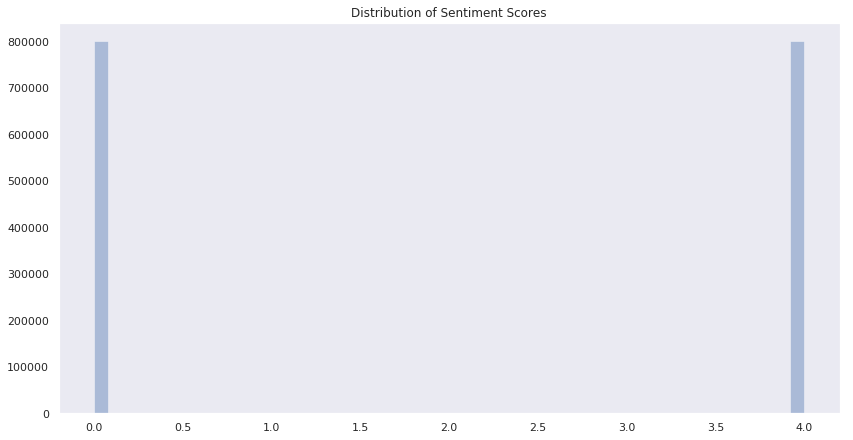

In [4]:
## Initial Data Visualization
print(data.describe())
print(len(data))
#print(data["Sentiment Score"].tolist())


fig, ax = plt.subplots(figsize=[14,7])
sentiment_histogram = sns.distplot(data["Sentiment Score"].tolist(), kde=False)#, height=7, aspect=0.9)
sns.set()
plt.subplots_adjust(top=0.9)
plt.title("Distribution of Sentiment Scores")
plt.grid()
#plt.savefig('figures\sns fig1.png') 

In [5]:
## Manually convert sentiment scores to positive/negative binary categories and move to target array

X = data.copy()
y = ["Positive" if sentiment == 4 else "Negative" for sentiment in X["Sentiment Score"]]

#Since sentiment can be considered to be ordinal, use label encoder
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

X = X.drop("Sentiment Score", axis=1)
display(X)
display(y)
print(le.classes_)
print(len(y))

,Tweet
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
5,@Kwesidei not the whole crew
6,Need a hug
7,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
8,@Tatiana_K nope they didn't have it
9,@twittera que me muera ?


array([0, 0, 0, ..., 1, 1, 1])

['Negative' 'Positive']
1600000


In [7]:
## Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.9, random_state=42)
#display(X_train)

display(X_train)
#display(X_valid)
display(y_train)
display(len(y_train))
#display(y_valid)

,Tweet
644091,God I'm sort of annoying its like great+ awful+fabulous at the same time! hahahahah shit
721723,"In VT, missing my hubby"
1057340,just got a present from apple
628980,@martinsays I want the new album â¥kinda of impossible
172036,"@LizzieGrubman have a great time in the Hamptons. Hope it's for some relaxation, not for work"
298089,"@bunnydozer Not lazy, missy. Actually been crazy busy and they're only open during certain hours. Plus they're 30min away from me"
391122,Hangovers are no fun
499323,@jennettemccurdy watching a sad episode of One Tree Hill on the other hand I hear you've been nominated for Best TV Sidekick
70209,@kinagrannis kina! http://tinyurl.com/ct546v why no Uke??
1329322,@shani_texas its almost over girl! I'm feeling giddy


array([0, 0, 1, ..., 0, 0, 0])

160000

In [93]:
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X, y, test_size=0.9, random_state=43)

## Preprocessing

In [45]:
## Example 
# ANOVA SVM-C
'''anova_filter = SelectKBest(f_regression, k=5)
clf = svm.SVC(kernel='linear')
anova_svm = Pipeline([('anova', anova_filter), ('svc', clf)])
# You can set the parameters using the names issued
# For instance, fit using a k of 10 in the SelectKBest
# and a parameter 'C' of the svm
anova_svm.set_params(anova__k=10, svc__C=.1).fit(X, y)
                      
Pipeline(memory=None,
         steps=[('anova', SelectKBest(...)),
                ('svc', SVC(...))])
prediction = anova_svm.predict(X)
#anova_svm.score(X, y)                        
#0.83'''

"anova_filter = SelectKBest(f_regression, k=5)\nclf = svm.SVC(kernel='linear')\nanova_svm = Pipeline([('anova', anova_filter), ('svc', clf)])\n# You can set the parameters using the names issued\n# For instance, fit using a k of 10 in the SelectKBest\n# and a parameter 'C' of the svm\nanova_svm.set_params(anova__k=10, svc__C=.1).fit(X, y)\n                      \nPipeline(memory=None,\n         steps=[('anova', SelectKBest(...)),\n                ('svc', SVC(...))])\nprediction = anova_svm.predict(X)\n#anova_svm.score(X, y)                        \n#0.83"

In [46]:
## Create preprocessing pipelines
from bs4 import BeautifulSoup
import re

## Column selector (removes non-essential columns as defined by user), X must be a pandas dataframe
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

## Custom transforms and preprocessing pipeline steps

In [8]:
## Numeric features if applicable
#numeric_features = ['age', 'fare']
#numeric_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='median')),
#    ('scaler', StandardScaler())])

## Categorical features if applicable
#categorical_features = ["Sentiment Score"]
#categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numeric_transformer, numeric_features),
#        ("cat", categorical_transformer, categorical_features)])

## Create custom transformer
class tweet_cleaner(BaseEstimator, TransformerMixin):
    def __init__(self, verbose=False):
        self.verbose = verbose
        
    def fit(self, X, y=None):
        if(self.verbose):
            print("Verbose mode on!")
        return self
    
    def transform(self, X, y=None):
        #display(X)
        #Use beautifulsoup to decode HTML code
        print("Preprocessing...")
        X_1 = [(BeautifulSoup(tweet,"lxml").get_text()) for tweet in X["Tweet"]]
        #X_2 = [re.sub(r"@[A-Za-z0-9]+","",tweet) for tweet in X_1]
        X_3 = [re.sub("https?://[A-Za-z0-9./]+","",tweet) for tweet in X_1]
        X_4 = [re.sub("www.[A-Za-z0-9./]+","",tweet) for tweet in X_3]
        #X_5 = [(tweet.decode("utf-8-sig")).replace(u"\ufffd","") for tweet in X_4]
        #X_5 = [re.sub("[^a-zA-Z]"," ", tweet) for tweet in X_4]
        #display(X_4)
        print("Preprocess Complete")

        return X_4
    

class keras_tokenizer(BaseEstimator, TransformerMixin):
    def __init__(self, verbose=False):
        self.verbose = verbose
        
    def fit(self, X, y=None):
        if(self.verbose):
            print("Verbose mode on!")
        return self
    
    def transform(self, X, y=None):
        #display(X)
        ## Use Keras tokenizer and padding for neural net inputs
        print("Tokenizing...")
        tokenizer = Tokenizer(nb_words=2500, lower=True,split=' ')
        tokenizer.fit_on_texts(X["Tweet"])
        #print(tokenizer.word_index)  # To see the dicstionary
        X = tokenizer.texts_to_sequences(X["Tweet"])
        X = pad_sequences(X)
        display(X)
        print("Tokenization Complete")

        return X

## Categorical features if applicable
tweet_col = ["Tweet"]
tweet_transformer = Pipeline(steps=[
    ("cleaner", tweet_cleaner()),
    ("tfidf_vectorizer", TfidfVectorizer())
    ])

tweet_transformer_keras = Pipeline(steps=[
    ("cleaner", tweet_cleaner()),
    ("keras_tokenizer", keras_tokenizer())
    ])
                      
preprocessor = ColumnTransformer(
    transformers=[
        ("tweet_transformer", tweet_transformer, tweet_col)
        ])

preprocessor_keras = ColumnTransformer(
    transformers=[
        ("tweet_transformer_keras", tweet_transformer_keras, tweet_col)
        ])

## Pipeline Initialization

In [9]:
## Initialize classifiers

## Random Forest
rf_clf = RandomForestClassifier(verbose=2)
rf_clf_fullpipe = Pipeline(steps=[
                            ("preprocessor", preprocessor),
                            ("rf_classifier", rf_clf)
                            ])
print(rf_clf_fullpipe)
print("")


## Gradient Boost
gb_clf = GradientBoostingClassifier(verbose=2)
gb_clf_fullpipe = Pipeline(steps=[
                            ("preprocessor", preprocessor),
                            ("gb_classifier", gb_clf)
                            ])
print(gb_clf_fullpipe)
print("")


## LightGBM
lgbm_clf = LGBMClassifier(silent=False,n_jobs=1)
lgbm_clf_fullpipe = Pipeline(steps=[
                                ("preprocessor", preprocessor),
                                ("lgbm_classifier", lgbm_clf)
                            ])
print(lgbm_clf_fullpipe)
print("")


## XGBoost
xgb_clf = XGBClassifier(verbosity=1)
xgb_clf_fullpipe = Pipeline(steps=[
                                ("preprocessor", preprocessor),
                                ("xgb_classifier", xgb_clf)
                            ])
print(xgb_clf_fullpipe)
print("")


## Support Vector Classification
svm_clf = SVC(verbose=2)
svm_clf_fullpipe = Pipeline(steps=[
                                ("preprocessor", preprocessor),
                                ("svm_classifier", svm_clf)
                            ])
print(svm_clf_fullpipe)

## Long short-term memory neural network
def create_LSTM(embed_dim,lstm_out,batch_size,dropout,dropout_U,dropout_W):
    #embed_dim = 128
    #lstm_out = 200
    #batch_size = 32
    #dropout = 0.2
    #dropout_U = 0.2
    #dropout_W = 0.2

    model = Sequential()
    model.add(layers.Embedding(2500,embed_dim,input_length=X_train.shape[1],dropout=dropout))
    model.add(layers.LSTM(lstm_out,dropout_U=dropout_U,dropout_W=dropout_W))
    model.add(layers.Dense(2,activation='softmax'))
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
    print(model.summary())

    return model

# wrap the model using the function you created
LSTM_clf = KerasClassifier(build_fn=create_LSTM,verbose=2)

LSTM_clf_fullpipe = Pipeline(steps=[
                                ("preprocessor_keras", preprocessor_keras),
                                ("LSTM_classifier", LSTM_clf)
                            ])
print(LSTM_clf_fullpipe)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('tweet_transformer', Pipeline(memory=None,
     steps=[('cleaner', tweet_cleaner(verbose=False)), ('tfidf_vectorizer', TfidfVectorizer(analyzer='w...obs=None,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False))])

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('tweet_transformer', Pipeline(memory=None,
     steps=[('cleaner', tweet_cleaner(verbose=False)), ('tfidf_vectorizer', TfidfVectorizer(analyzer='w...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=2, warm_start=False))])

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         tra

NameError: name 'KerasClassifier' is not defined

In [167]:
## Initiate a full preprocessing and prediction pipeline

max_depth = [int(x) for x in np.linspace(10,110,11)]
max_depth.append(None)

gamma = [x for x in np.logspace(-15,3,base=2,num=7)]
gamma.append("scale")
gamma.append("auto")

## RandomizedSearchCV hyperparameter optimization
rf_param_grid = {
    "rf_classifier__n_estimators": [int(x) for x in np.linspace(50,500,11)],
    "rf_classifier__max_depth": max_depth,
    "rf_classifier__max_features": ["auto"],
    "rf_classifier__min_samples_split": [2, 10, 100],
    "rf_classifier__min_samples_leaf": [1, 2, 4, 10],
    }

gb_param_grid = {
    "gb_classifier__n_estimators": [int(x) for x in np.linspace(50,500,11)],
    "gb_classifier__max_depth": max_depth
    }

lgbm_param_grid = {
    "lgbm_classifier__n_estimators": [int(x) for x in np.linspace(50,550,11)],
    "lgbm_classifier__max_depth": max_depth,
    }

xgb_param_grid = {
    "xgb_classifier__n_estimators": [int(x) for x in np.linspace(50,550,11)],
    "xgb_classifier__max_depth": max_depth,  
    }

svm_param_grid = {
    "svm_classifier__C": [x for x in np.logspace(-5,15,base=2,num=7)],
    "svm_classifier__gamma": gamma
    }

In [168]:
param_grid = {
    #"preprocessor__tweet_transformer__tfidf_vectorizer__max_df": np.linspace(0.2, 1, 10),
    "preprocessor__tweet_transformer__tfidf_vectorizer__binary": [True],
    "preprocessor__tweet_transformer__tfidf_vectorizer__token_pattern": [r"(?u)\b\w\w+\b|\'"],
    "preprocessor__tweet_transformer__tfidf_vectorizer__ngram_range": [(1,2)],
    }

rf_param_grid.update(param_grid)
gb_param_grid.update(param_grid)
lgbm_param_grid.update(param_grid)
xgb_param_grid.update(param_grid)
svm_param_grid.update(param_grid)

In [169]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {
            "RandomForest" : (rf_clf_fullpipe, rf_param_grid),
            "GradientBoosting" : (gb_clf_fullpipe, gb_param_grid),
            "XGBoost" : (xgb_clf_fullpipe, xgb_param_grid),
            "LightGBM" : (lgbm_clf_fullpipe, lgbm_param_grid),
            "SVC" : (svm_clf_fullpipe, svm_param_grid),
            "VotingClassifier" : (vote_clf_fullpipe,)
            }

In [170]:
## Function to fit a model pipeline
def pipeline_fit(pipeline, cv, iid, verbose, n_jobs, optimization):

    if optimization == True:
        ## Do hyperparameter optimization using RandomizedSearchCV
        
        rand_search = RandomizedSearchCV(pipe_dict[pipeline][0], pipe_dict[pipeline][1], cv=cv, iid=iid, verbose=verbose, n_jobs=n_jobs)

        ## Train the model
        print("Training "+pipeline+" on "+str(len(y_train))+" samples...")
        rand_search.fit(X_train, y_train)

        print("")
        print(pipeline+":")
        print("Best Score: ", rand_search.best_score_)
        print("Best Params: ", rand_search.best_params_)

        ## Use joblib to dump the best estimator to joblib file for persistence purposes
        clf_final = rand_search.best_estimator_
        dump(clf_final, "twitter_"+pipeline+".joblib")

        return clf_final
    
    else:
        ## No optimization is performed, fit to model only
        print("Training "+pipeline+" on "+str(len(y_train))+" samples...")
        print(pipe_dict[pipeline][0].steps[1])
        clf_final = pipe_dict[pipeline][0].fit(X_train, y_train)

        ## Use joblib to dump the best estimator to joblib file for persistence purposes
        dump(clf_final, "twitter_"+pipeline+".joblib")

        return clf_final
        

In [86]:
## Activate full pipeline
lgbm_clf_final = pipeline_fit(pipeline="LightGBM", cv=5, iid=False, verbose=1, n_jobs=1, optimization=True)

Training LightGBM on 160000 samples...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 296.2min finished



LightGBM:
Best Score:  0.79089375
Best Params:  {'preprocessor__tweet_transformer__tfidf_vectorizer__token_pattern': "(?u)\\b\\w\\w+\\b|\\'", 'preprocessor__tweet_transformer__tfidf_vectorizer__ngram_range': (1, 2), 'preprocessor__tweet_transformer__tfidf_vectorizer__binary': True, 'lgbm_classifier__n_estimators': 500, 'lgbm_classifier__max_depth': 110}


In [106]:
xgb_clf_final = pipeline_fit(pipeline="XGBoost", cv=5, iid=False, verbose=1, n_jobs=1, optimization=True)

Training XGBoost on 160000 samples...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [129]:
rf_clf_final = pipeline_fit(pipeline="RandomForest", cv=5, iid=False, verbose=1, n_jobs=1, optimization=True)

Training RandomForest on 160000 samples...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.6s finished
[Parallel(n_j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:   25.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:   26.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Us


RandomForest:
Best Score:  0.7796625
Best Params:  {'rf_classifier__n_estimators': 500, 'rf_classifier__min_samples_split': 100, 'rf_classifier__min_samples_leaf': 2, 'rf_classifier__max_features': 'auto', 'rf_classifier__max_depth': None, 'preprocessor__tweet_transformer__tfidf_vectorizer__token_pattern': "(?u)\\b\\w\\w+\\b|\\'", 'preprocessor__tweet_transformer__tfidf_vectorizer__ngram_range': (1, 2), 'preprocessor__tweet_transformer__tfidf_vectorizer__binary': True}


In [ ]:
svm_clf_final = pipeline_fit(pipeline="SVC", cv=5, iid=False, verbose=2, n_jobs=1, optimization=True)

## Predictions

In [130]:
## Load estimator via joblib

lgbm_clf_final = load("twitter_LightGBM.joblib")
rf_clf_final = load("twitter_RandomForest.joblib")

In [139]:
print(lgbm_clf_final.named_steps["lgbm_classifier"])
print("")
print(rf_clf_final.named_steps["rf_classifier"])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=110,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=500, n_jobs=1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)


In [153]:
## Use a soft voting classifier to make final predictions from all models
vote_clf = VotingClassifier(estimators=[
                            ("rf_clf", rf_clf_final.named_steps["rf_classifier"]),
                            #("gb_clf", gb_clf_final), 
                            #("xgb_clf", xgb_clf_final),
                            ("lgbm_clf", lgbm_clf_final.named_steps["lgbm_classifier"])
                            ], voting="soft")

vote_clf_fullpipe = Pipeline(steps=[
                                ("preprocessor", preprocessor),
                                ("voting_classifier", vote_clf)
                            ])

print(vote_clf_fullpipe)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('tweet_transformer', Pipeline(memory=None,
     steps=[('cleaner', tweet_cleaner(verbose=False)), ('tfidf_vectorizer', TfidfVectorizer(analyzer='w...0, subsample_freq=0))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None))])


In [157]:
vote_clf_final = pipeline_fit(pipeline="VotingClassifier", cv=None, iid=False, verbose=2, n_jobs=1, optimization=False)

Training VotingClassifier on 160000 samples...
('voting_classifier', VotingClassifier(estimators=[('rf_clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=100,
            ..., reg_lambda=0.0, silent=False,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 14.0min finished


In [159]:
#display(X_valid)
y_pred = vote_clf_final.predict(X_valid)
#y_pred = lgbm_clf_final.predict(X_valid)
print("Predicted Targets:",y_pred)
print("Actual Targets:",y_valid)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 14.7min finished


Predicted Targets: [1 0 1 ... 1 1 1]
Actual Targets: [0 0 0 ... 1 0 1]


In [94]:
y_pred_2 = lgbm_clf_final.predict(X_valid_2)
print("Predicted Targets:",y_pred_2)
print("Actual Targets:",y_valid_2)

Predicted Targets: [0 1 1 ... 1 0 1]
Actual Targets: [0 1 1 ... 1 1 1]


In [160]:
#y_pred_inv = le.inverse_transform(y_pred)
target_names = le.classes_
print("Target names: ",target_names)
n_classes = le.classes_.shape[0]
print("n_classes: ",n_classes)
print("\nClassification Report:")
print(classification_report(y_valid, y_pred, target_names=target_names))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred, labels=range(n_classes)))

Target names:  ['Negative' 'Positive']
n_classes:  2

Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.79      0.79    719965
    Positive       0.79      0.79      0.79    720035

   micro avg       0.79      0.79      0.79   1440000
   macro avg       0.79      0.79      0.79   1440000
weighted avg       0.79      0.79      0.79   1440000

Confusion Matrix:
[[567825 152140]
 [153898 566137]]


In [95]:
target_names = le.classes_
print("Target names: ",target_names)
n_classes = le.classes_.shape[0]
print("n_classes: ",n_classes)
print("\nClassification Report:")
print(classification_report(y_valid_2, y_pred_2, target_names=target_names))
print("Confusion Matrix:")
print(confusion_matrix(y_valid_2, y_pred_2, labels=range(n_classes)))

Target names:  ['Negative' 'Positive']
n_classes:  2

Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      0.79      0.80    719801
    Positive       0.79      0.80      0.80    720199

   micro avg       0.80      0.80      0.80   1440000
   macro avg       0.80      0.80      0.80   1440000
weighted avg       0.80      0.80      0.80   1440000

Confusion Matrix:
[[569211 150590]
 [142762 577437]]


Confusion matrix, without normalization
[[568622 151343]
 [147019 573016]]


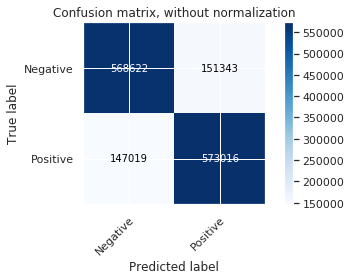

In [92]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label'
          )

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_valid, y_pred, classes=le.classes_, normalize=False,
                      title=None)